https://towardsdatascience.com/hands-on-introduction-to-reinforcement-learning-in-python-da07f7aaca88

In [1]:
import numpy as np

ACTIONS = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}

class Maze(object):
    def __init__(self):
        # start with defining your maze
        self.maze = np.zeros((6, 6))
        self.maze[0, 0] = 2
        self.maze[5, :5] = 1
        self.maze[:4, 5] = 1
        self.maze[2, 2:] = 1
        self.maze[3, 2] = 1
        self.robot_position = (0, 0) # current robot position
        self.steps = 0 # contains num steps robot took
        self.allowed_states = None # for now, this is none
        self.construct_allowed_states() # not implemented yet
    
    def print_maze(self):
        print('---------------------------------')
        for row in self.maze:
            for col in row:
                if col == 0:
                    print('', end="\t") # empty space
                elif col == 1:
                    print('X', end="\t") # walls
                elif col == 2:
                    print('R', end="\t") # robot position
            print("\n")
        print('---------------------------------')

    def is_allowed_move(self, state, action):
        y, x = state
        y += ACTIONS[action][0]
        x += ACTIONS[action][1]
        # moving off the board
        if y < 0 or x < 0 or y > 5 or x > 5:
            return False
        # moving into start position or empty space
        if self.maze[y, x] == 0 or self.maze[y, x] == 2:
            return True
        else:
            return False
    
    def construct_allowed_states(self):
        allowed_states = {}
        for y, row in enumerate(self.maze):
            for x, col in enumerate(row):
                # iterate through all valid spaces
                if self.maze[(y,x)] != 1:
                    allowed_states[(y,x)] = []
                    for action in ACTIONS:
                        if self.is_allowed_move((y, x), action):
                            allowed_states[(y,x)].append(action)
        self.allowed_states = allowed_states

    def update_maze(self, action):
        y, x = self.robot_position
        self.maze[y, x] = 0 # set the current position to empty
        y += ACTIONS[action][0]
        x += ACTIONS[action][1]
        self.robot_position = (y, x)
        self.maze[y, x] = 2
        self.steps += 1
    
    def is_game_over(self):
        if self.robot_position == (5, 5):
            return True
        return False
    
    def give_reward(self):
        if self.robot_position == (5, 5):
            return 0
        else:
            return -1
        
    def get_state_and_reward(self):
        return self.robot_position, self.give_reward()

class Agent(object):
    def __init__(self, states, alpha=0.15, random_factor=0.2):
        self.state_history = [((0, 0), 0)] # state, reward
        self.alpha = alpha
        self.random_factor = random_factor
        
        # start the rewards table
        self.G = {}
        self.init_reward(states)
    
    def init_reward(self, states):
        for i, row in enumerate(states):
            for j, col in enumerate(row):
                self.G[(j,i)] = np.random.uniform(high=1.0, low=0.1)

    def update_state_history(self, state, reward):
        self.state_history.append((state, reward))

    def learn(self):
        target = 0 # we know the "ideal" reward
        a = self.alpha

        for state, reward in reversed(self.state_history):
            self.G[state] = self.G[state] + a * (target - self.G[state])
        
        self.state_history = [] # reset the state_history
        self.random_factor -= 10e-5 # decrease random_factor
    
    def choose_action(self, state, allowed_moves):
        next_move = None
        n = np.random.random()

        if n < self.random_factor:
            next_move = np.random.choice(allowed_moves)
        else:
            maxG = -10e15 # some really small random number
            for action in allowed_moves:
                new_state = tuple([sum(x) for x in zip(state, ACTIONS[action])])
                if self.G[new_state] >= maxG:
                    next_move = action
                    maxG = self.G[new_state]
        return next_move

0
1000
2000
3000
4000


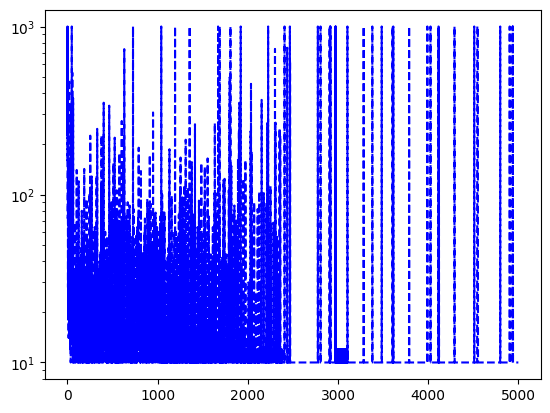

In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

maze = Maze()
robot = Agent(maze.maze, alpha=0.1, random_factor=0.25)
moveHistory = []

for i in range(5000):
    if i % 1000 == 0:
        print(i)
    
    while not maze.is_game_over():
        state, _ = maze.get_state_and_reward()
        action = robot.choose_action(state, maze.allowed_states[state])
        maze.update_maze(action)
        state, reward = maze.get_state_and_reward()
        robot.update_state_history(state, reward)

        if maze.steps > 1000:
                # end the robot if it takes too long to find the goal
                maze.robot_position = (5, 5)
        
        # maze.print_maze()
        # print(maze.steps)
        # clear_output(wait=True)
        # sleep(0.01)
    
    robot.learn()
    moveHistory.append(maze.steps)
    
    maze = Maze()

plt.semilogy(moveHistory, "b--")
plt.show()

In [3]:
maze = Maze()

while not maze.is_game_over():
    state, _ = maze.get_state_and_reward()
    action = robot.choose_action(state, maze.allowed_states[state])
    maze.update_maze(action)

    maze.print_maze()
    print(maze.steps)
    clear_output(wait=True)
    sleep(0.5)

---------------------------------
					X	

					X	

		X	X	X	X	

		X			X	

						

X	X	X	X	X	R	

---------------------------------
10
